<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#loading-the-boston-dataset-which-has-the-median-values-of-owner-occupied-homes-in-thousands-of-dollars-as-it-target" data-toc-modified-id="loading-the-boston-dataset-which-has-the-median-values-of-owner-occupied-homes-in-thousands-of-dollars-as-it-target-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>loading the boston dataset which has the median values of owner-occupied homes in thousands of dollars as it target</a></span></li><li><span><a href="#The-names-of-the--features-including-the-target-variable-of-the-dataset-are-printed-out-by-the-code-below" data-toc-modified-id="The-names-of-the--features-including-the-target-variable-of-the-dataset-are-printed-out-by-the-code-below-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The names of the  features including the target variable of the dataset are printed out by the code below</a></span></li><li><span><a href="#information-about-the-dataset" data-toc-modified-id="information-about-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>information about the dataset</a></span></li></ul></div>

# REGRESSION PROBLEM
It models the expected value of a quantitative response (dependent) variable  from one or more explanatory variables (independent variables). 

# The Boston Housing Price dataset
With the dataset our goal is to build a regression model that is able to predict the expected median price of homes in a given Boston suburb in the mid-1970s

In [1]:
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from keras import  layers,models
from sklearn.impute import  SimpleImputer as Imputer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.



(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

## loading the boston dataset which has the median values of owner-occupied homes in thousands of dollars as it target 

In [3]:
housing=pd.read_csv('../data/housing.csv')

In [4]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [5]:
print('the housing dataset contain '+str(housing.shape[0])+' observations with ' +str(housing.shape[1]-1)+ 
      ' features and a target variable named median_house_value making it '+ str(housing.shape[1]))

the housing dataset contain 20640 observations with 9 features and a target variable named median_house_value making it 10


## The names of the  features including the target variable of the dataset are printed out by the code below

In [6]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


## information about the dataset

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The dataset contain 20,640 observations but the total_bedrooms feature/attribute has only 20,433 non-null values, which means 
it has 20640-20,433 =207  missing values. 

All features are numerical (float64), except the ocean_proximity feature which has its type as object (could hold any kind of Python object), but from the first 4 observations printed out it is a text attribute (probably categorical feature)

# descriptive statistics about the numerical features

In [8]:
housing.describe(exclude=[np.object])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# correlation between the numerical variables

In [9]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# how the numerical variables correlate with the target variable median_house_value

In [10]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

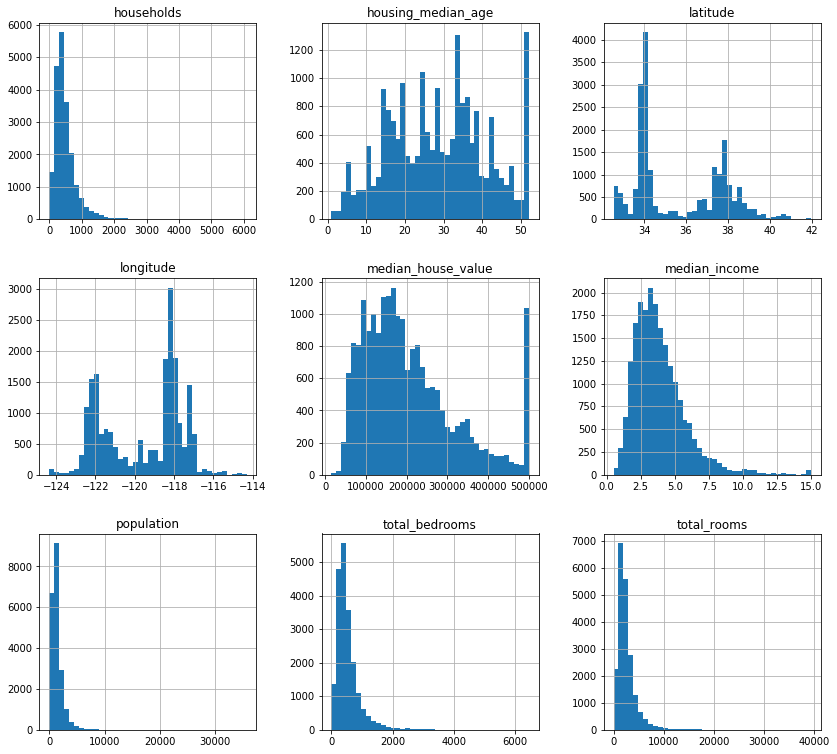

In [11]:
housing.hist(bins=40, figsize=(14,13))
plt.show()

displying the distinct categories that exist in the ocean_proximity feature and how many districts belong to each category

In [12]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

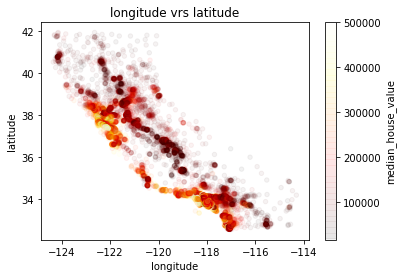

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude",cmap=plt.get_cmap("hot"),
             title="longitude vrs latitude",colorbar=True,alpha=.05,c="median_house_value")

# MISSING VALUES Treatment

In [14]:
print('                number of missing values in each variable \n \n',housing.isna().sum())

                number of missing values in each variable 
 
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


# percentage of missing values in each variable after treatment

In [15]:
# percentage of missing values in each variable
print(np.round(housing.isna().sum()/len(housing)*100,3))

longitude             0.000
latitude              0.000
housing_median_age    0.000
total_rooms           0.000
total_bedrooms        1.003
population            0.000
households            0.000
median_income         0.000
median_house_value    0.000
ocean_proximity       0.000
dtype: float64


# a function to fill the missing values within a numerical feature with the mean of that feature

In [16]:
def fill_num_missing(data,cols=None):
    # columns with missing values
    missing_data=data[[cols]]
    missing_data=np.reshape(missing_data,(-1,1))
    # first creat imputer object
    imputer=Imputer(missing_values=np.nan, strategy='mean')
    data_df=imputer.fit_transform(missing_data)
    data_df=pd.DataFrame(data_df, columns=missing_data.columns)
    data[cols]=data_df

In [17]:
fill_num_missing(housing,cols='total_bedrooms')

# percentage of missing values in each variable after treatment

In [18]:
print(np.round(housing.isna().sum()/len(housing)*100,3))

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64


# a function to encode the categorical variable

In [19]:
def encode_cat(data,cols=None):
    # columns with missing values
    cat_var=data[[cols]]
    #cat_var=np.reshape(cat_var,(-1,1))
    # first creat imputer object
    onehot=OneHotEncoder(sparse=False)
    data_df=onehot.fit_transform(cat_var)
    data_df=pd.DataFrame(data_df, columns=onehot.categories_)
    data.drop([cols],axis=1,inplace=True)
    data[['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN']]=data_df

In [20]:
encode_cat(housing,cols='ocean_proximity')

In [21]:
def prepro(housing):
    housing["rooms_per_household"] = housing.total_rooms/housing.households
    housing["bedrooms_per_room"] = housing.total_bedrooms/housing.total_rooms
    housing["population_per_household"]=housing.population/housing.households
    housing.drop(['households','total_rooms','households','total_bedrooms','total_rooms','population'],axis=1,inplace=True)
    return housing

In [22]:
housing=prepro(housing)

In [23]:
corr_matrix=housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
<1H OCEAN                   0.256617
NEAR BAY                    0.160284
rooms_per_household         0.151948
NEAR OCEAN                  0.141862
housing_median_age          0.105623
ISLAND                      0.023416
population_per_household   -0.023737
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.220049
INLAND                     -0.484859
Name: median_house_value, dtype: float64

# rearranging the columns so that the target variable will be the last column

In [24]:
cols=[col for col in housing if col != 'median_house_value']+['median_house_value']
housing=housing[cols]

In [25]:
housing.head(3)

,longitude,latitude,housing_median_age,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
0,-122.23,37.88,41.0,8.3252,0.0,0.0,0.0,1.0,0.0,6.984127,0.146591,2.555556,452600.0
1,-122.22,37.86,21.0,8.3014,0.0,0.0,0.0,1.0,0.0,6.238137,0.155797,2.109842,358500.0
2,-122.24,37.85,52.0,7.2574,0.0,0.0,0.0,1.0,0.0,8.288136,0.129516,2.802260,352100.0


In [26]:
housing.shape

(20640, 13)

In [27]:
features=housing.iloc[:,:-1]
target=housing.iloc[:,-1]

In [28]:
features.shape

(20640, 12)

In [29]:
features.head(2)

,longitude,latitude,housing_median_age,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,0.0,0.0,0.0,1.0,0.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,0.0,0.0,0.0,1.0,0.0,6.238137,0.155797,2.109842


In [30]:
target.head(2)

0    452600.0
1    358500.0
Name: median_house_value, dtype: float64

In [31]:
def z_score(data):
    return data.apply(lambda x: (x-np.mean(x))/np.std(x))

In [32]:
features=z_score(features)

In [33]:
features.head(2)

,longitude,latitude,housing_median_age,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,1.052548,0.982143,2.344766,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,0.628559,-0.973116,-0.049597
1,-1.322844,1.043185,-0.607019,2.332238,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,0.327041,-0.841159,-0.092512


In [34]:
np.random.seed(9988)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [35]:
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((6192, 12), (6192,), (14448, 12), (14448,))

# Model

In [36]:
def regression_model():
    network=models.Sequential()
    network.add(layers.Dense(50,activation='relu',input_shape=(12,)))
    network.add(layers.Dense(20,activation='relu'))
    network.add(layers.Dense(1))
    network.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])#mean_absolute_error
    return network

we are using mean squared error (mse) as our loss function which is the square of the difference between the predictions and the targets. We will be using  mean absolute error (MAE) as a monitor a during training:. MAE is the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem will mean our predictions are off by $500 on average.


# K-Fold Cross-Validation
In practice if we have enough data, we set aside part of the data set known as the validation set and use it to measure the performance of our model prediction but since data are often scarce, this is usually not possible and the best practice in such situations is to use <b> K-fold cross-validation</b>. K-fold cross-validation consists of splitting the available data into K partitions (typically K = 4 or 5). The model is train on the K – 1 parts of the data and evaluated on the  remaining k part. The average of the K validation scores is then obtained and used as the validation score for the model.

<img src="images/KFOLD.png" />

In [37]:
k = 5
num_val_samples = len(X_train) // k
num_epochs = 20
all_scores = []
for i in range(k):
    print('processing fold:',i)
    val_data=X_train[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=y_train[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data=np.concatenate([X_train[:i*num_val_samples],X_train[(i+1)*num_val_samples:]],
                                      axis=0)
    
    partial_train_targets=np.concatenate( [ y_train[:i*num_val_samples], y_train[(i+1)*num_val_samples:]],axis=0)
    model = regression_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)            

processing fold: 0
processing fold: 1
processing fold: 2
processing fold: 3
processing fold: 4


In [38]:
all_scores

[45907.078125, 44378.296875, 45230.79296875, 45214.61328125, 46232.953125]

In [39]:
av_val_score=np.mean(all_scores)
av_val_score

45392.746875

considering that the prices range from $14999.0$ to $500001.0$ we are off by $45336.44$ on average, which is some how  bad

In [40]:
500001.0-45336.44

454664.56